In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("副本工作簿1.xlsx", sheet_name="111 ")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

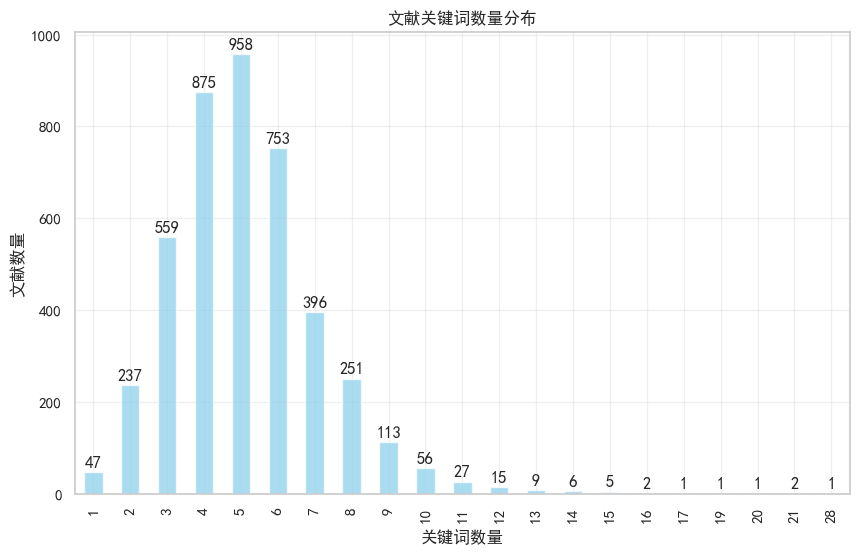

In [19]:
# 文章关键词数量分布
keyword_counts = data["AF"].str.count(";") + 1
keyword_counts.value_counts().sort_index().plot(
    kind="bar", color="skyblue", alpha=0.7, figsize=(10, 6)
)
# 每个显示数量
for i, count in enumerate(keyword_counts.value_counts().sort_index()):
    plt.text(i, count + 10, str(count), ha="center")
plt.xlabel("关键词数量")
plt.ylabel("文献数量")
plt.title("文献关键词数量分布")
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\棒\AppData\Local\Temp\ipykernel_25184\1109713727.py:36: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\棒\AppData\Local\Temp\ipykernel_25184\1109713727.py:36: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\棒\AppData\Local\Temp\ipykernel_25184\1109713727.py:36: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\棒\AppData\Local\Temp\ipykernel_25184\1109713727.py:36: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\棒\AppData\Local\Temp\ipykernel_25184\1109713727.py:36: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\棒\AppData\Local\Temp\ipykernel_25184\1109713727.py:36: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) Ar

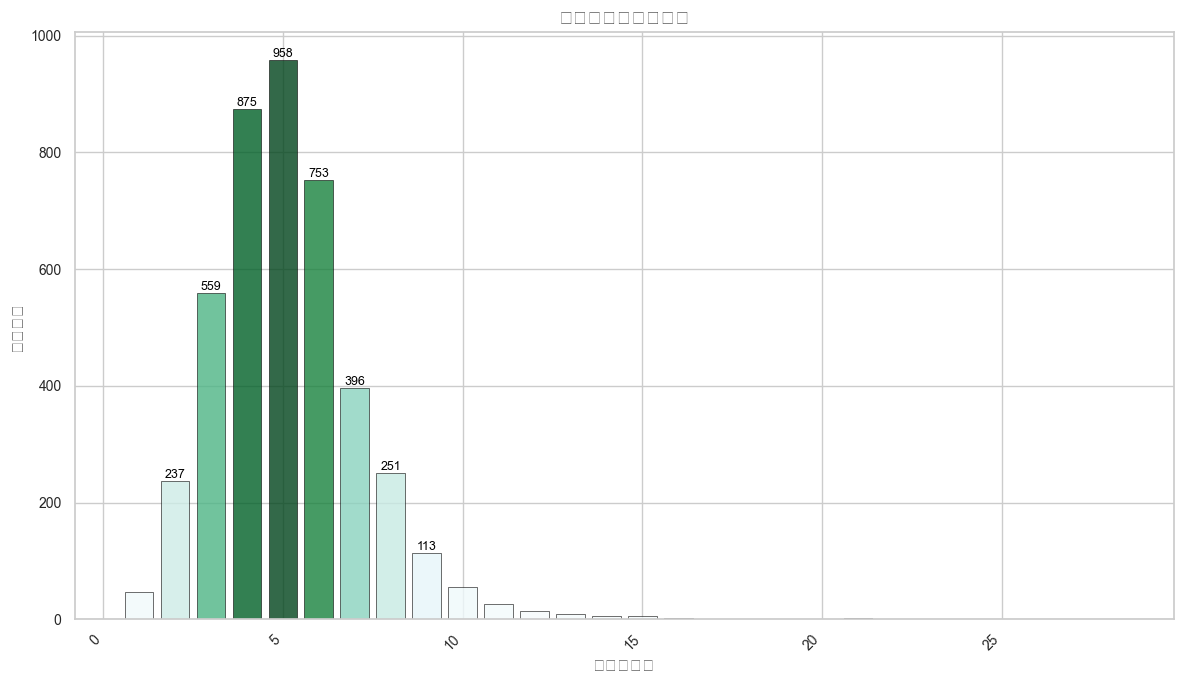

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# 计算关键词数量
keyword_counts = data["AF"].str.count(";") + 1
counts = keyword_counts.value_counts().sort_index()

# 设置 Seaborn 风格
sns.set_style("whitegrid")

# 创建画布
plt.figure(figsize=(12, 7))

# 根据计数值计算颜色渐变
colors = cm.BuGn(counts.values / float(max(counts.values)))

# 绘制条形图
bars = plt.bar(
    counts.index,
    counts.values,
    color=colors,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
)

# 添加数据标签（仅对大于 100 的值）
plt.bar_label(
    bars,
    labels=[str(int(count)) if count > 100 else "" for count in counts.values],
    fontsize=9,
    color="black",
)

# 设置 x 轴标签旋转和字体大小
plt.xticks(rotation=45, ha="right", fontsize=10)

# 设置 y 轴字体大小
plt.yticks(fontsize=10)

# 设置轴标签和标题
plt.xlabel("关键词数量", fontsize=12, fontweight="bold")
plt.ylabel("文献数量", fontsize=12, fontweight="bold")
plt.title("文献关键词数量分布", fontsize=14, fontweight="bold")

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

C:\Users\棒\AppData\Local\Temp\ipykernel_25184\1764192997.py:139: UserWarning: Glyph 8226 (\N{BULLET}) missing from font(s) SimHei.
  plt.tight_layout(rect=[0, 0.03, 1, 0.97], pad=3)
c:\Github\algo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8226 (\N{BULLET}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


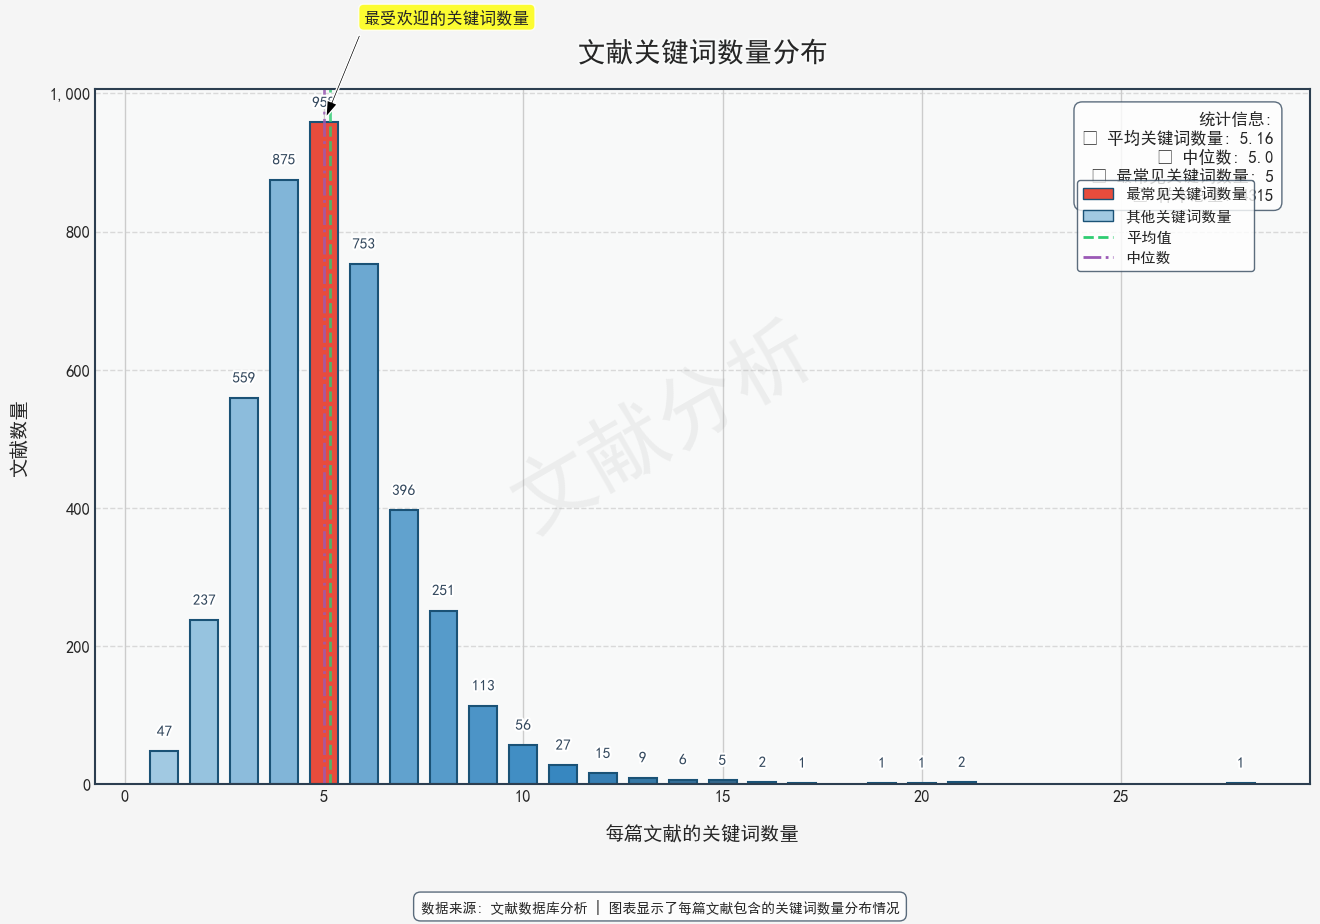

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects

# 设置风格
plt.style.use("seaborn-v0_8-whitegrid")  # 使用 seaborn 的白色网格风格
plt.rcParams["font.sans-serif"] = [
    "SimHei"
]  # 解决中文显示问题（如果你的系统支持 SimHei）
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题
sns.set_palette("pastel")

# 计算关键词数量
keyword_counts = data["AF"].str.count(";") + 1
counts_series = keyword_counts.value_counts().sort_index()

# 计算统计信息用于注释
mean_keywords = keyword_counts.mean()
median_keywords = keyword_counts.median()
most_common = counts_series.idxmax()

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(14, 10), dpi=100)

# 设置背景
fig.patch.set_facecolor("#F5F5F5")  # 浅灰色背景
ax.set_facecolor("#F8F9F9")  # 更浅的背景色

# 创建自定义颜色映射
colors = sns.color_palette("Blues_d", len(counts_series))
# 突出显示最常见的关键词数量
highlight_colors = colors.copy()
highlight_idx = list(counts_series.index).index(most_common)
highlight_colors[highlight_idx] = "#E74C3C"  # 红色突出显示最常见值

# 绘制柱状图
bars = ax.bar(
    counts_series.index,
    counts_series.values,
    width=0.7,
    edgecolor="#1A5276",
    linewidth=1.5,
    color=highlight_colors,
)

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    text = ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + (max(counts_series.values) * 0.02),
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        color="#34495E",
    )
    # 添加文本轮廓，使其在背景上更加清晰
    text.set_path_effects([path_effects.withStroke(linewidth=3, foreground="white")])

# 设置坐标轴
ax.set_xlabel("每篇文献的关键词数量", fontsize=14, fontweight="bold", labelpad=15)
ax.set_ylabel("文献数量", fontsize=14, fontweight="bold", labelpad=15)

# 设置刻度
ax.tick_params(axis="both", which="major", labelsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# 设置标题
title = plt.title("文献关键词数量分布", fontsize=20, fontweight="bold", pad=20)
title.set_path_effects([path_effects.withStroke(linewidth=3, foreground="#F8F9F9")])

# 添加网格线
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_axisbelow(True)  # 确保网格线在图形元素下方

# 添加边框和阴影效果
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("#2C3E50")
    spine.set_linewidth(1.5)

# 添加平均值和中位数线
ax.axvline(x=mean_keywords, color="#2ECC71", linestyle="--", linewidth=2, alpha=0.8)
ax.axvline(x=median_keywords, color="#9B59B6", linestyle="-.", linewidth=2, alpha=0.8)

# 添加统计信息注释框
stats_text = (
    f"统计信息:\n"
    f"• 平均关键词数量: {mean_keywords:.2f}\n"
    f"• 中位数: {median_keywords:.1f}\n"
    f"• 最常见关键词数量: {most_common}\n"
    f"• 样本总量: {len(keyword_counts)}"
)

props = dict(
    boxstyle="round,pad=0.5", facecolor="white", alpha=0.8, edgecolor="#34495E"
)
ax.text(
    0.97,
    0.97,
    stats_text,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=props,
)

# 创建图例
legend_elements = [
    Patch(
        facecolor=highlight_colors[highlight_idx],
        edgecolor="#1A5276",
        label="最常见关键词数量",
    ),
    Patch(facecolor=colors[0], edgecolor="#1A5276", label="其他关键词数量"),
    plt.Line2D([0], [0], color="#2ECC71", lw=2, linestyle="--", label="平均值"),
    plt.Line2D([0], [0], color="#9B59B6", lw=2, linestyle="-.", label="中位数"),
]
ax.legend(
    handles=legend_elements,
    loc="upper right",
    bbox_to_anchor=(0.96, 0.88),
    fontsize=11,
    frameon=True,
    facecolor="white",
    edgecolor="#34495E",
)

# 添加数据来源和解释
plt.figtext(
    0.5,
    0.01,
    "数据来源: 文献数据库分析 | 图表显示了每篇文献包含的关键词数量分布情况",
    ha="center",
    fontsize=10,
    fontstyle="italic",
    bbox=dict(
        facecolor="white", alpha=0.8, edgecolor="#34495E", boxstyle="round,pad=0.5"
    ),
)

# 添加解释性注释
if len(counts_series) > 3:
    max_idx = counts_series.values.argmax()
    max_x = list(counts_series.index)[max_idx]
    max_y = counts_series.values[max_idx]

    ax.annotate(
        "最受欢迎的关键词数量",
        xy=(max_x, max_y),
        xytext=(max_x + 1, max_y + max(counts_series.values) * 0.15),
        arrowprops=dict(facecolor="black", shrink=0.05, width=1.5, headwidth=8),
        fontsize=12,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.8),
    )
# 调整布局
plt.tight_layout(rect=[0, 0.03, 1, 0.97], pad=3)

# 显示图形
plt.show()

C:\Users\棒\AppData\Local\Temp\ipykernel_25184\2323177988.py:89: UserWarning: Glyph 8226 (\N{BULLET}) missing from font(s) SimHei.
  plt.tight_layout(pad=3)
c:\Github\algo\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8226 (\N{BULLET}) missing from font(s) SimHei.
  func(*args, **kwargs)
c:\Github\algo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8226 (\N{BULLET}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


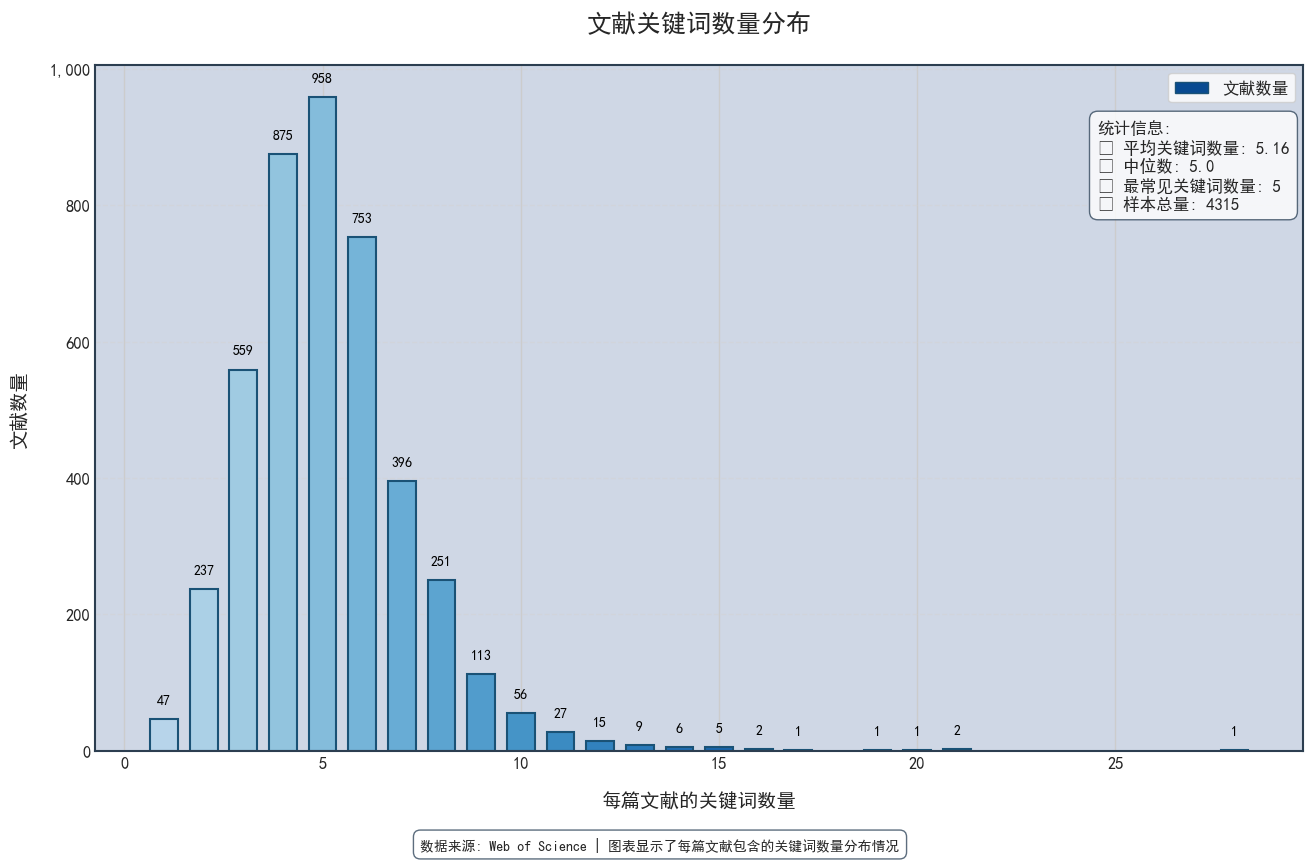

In [ ]:
import matplotlib.ticker as ticker
from matplotlib.patches import Patch

# 设置全局字体为支持中文的字体
plt.style.use("seaborn-v0_8-whitegrid")  # 使用 seaborn 的白色网格风格
plt.rcParams["font.sans-serif"] = [
    "SimHei"
]  # 解决中文显示问题（如果你的系统支持 SimHei）
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题
# 设置风格 (浅色背景，带纹理)
sns.set_palette("pastel")
# 计算关键词数量
keyword_counts = data["AF"].str.count(";") + 1
counts_series = keyword_counts.value_counts().sort_index()
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(14, 9), dpi=100)
# 绘制柱状图 (渐变色)
cmap = plt.get_cmap("Blues")  # 获取蓝色渐变色图
colors = [cmap(i) for i in np.linspace(0.3, 1, len(counts_series))]
bars = ax.bar(
    counts_series.index,
    counts_series.values,
    width=0.7,
    edgecolor="#1A5276",
    linewidth=1.5,
    color=colors,
)
# 添加数据标签 (白色字体，以增加对比度)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + (max(counts_series.values) * 0.02),
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="black",  # 白色标签
    )
# 设置坐标轴
ax.set_xlabel("每篇文献的关键词数量", fontsize=14, fontweight="bold", labelpad=15)
ax.set_ylabel("文献数量", fontsize=14, fontweight="bold", labelpad=15)
# 设置刻度
ax.tick_params(axis="both", which="major", labelsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
# 添加统计信息注释框
stats_text = (
    f"统计信息:\n"
    f"• 平均关键词数量: {mean_keywords:.2f}\n"
    f"• 中位数: {median_keywords:.1f}\n"
    f"• 最常见关键词数量: {most_common}\n"
    f"• 样本总量: {len(keyword_counts)}"
)

props = dict(
    boxstyle="round,pad=0.5", facecolor="white", alpha=0.8, edgecolor="#34495E"
)
ax.text(
    0.83,
    0.92,
    stats_text,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=props,
)
# 设置标题
plt.title("文献关键词数量分布", fontsize=18, fontweight="bold", pad=25)
# 添加网格线 (更淡的颜色)
ax.grid(axis="y", linestyle="--", alpha=0.5, color="lightgray")
ax.set_axisbelow(True)
# 添加边框
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("#2C3E50")
    spine.set_linewidth(1.5)
# ---- 添加图例和注释 ----
# 1. 自定义图例
legend_elements = [Patch(facecolor=cmap(0.9), edgecolor="#1A5276", label="文献数量")]
ax.legend(handles=legend_elements, loc="upper right", fontsize=12, frameon=True)

# 添加数据来源和解释
plt.figtext(
    0.5,
    0.01,
    "数据来源: Web of Science | 图表显示了每篇文献包含的关键词数量分布情况",
    ha="center",
    fontsize=10,
    fontstyle="italic",
    bbox=dict(
        facecolor="white", alpha=0.8, edgecolor="#34495E", boxstyle="round,pad=0.5"
    ),
)
# ---- 背景美化 ----
# 1. 添加浅色渐变背景
ax.set_facecolor(color=sns.color_palette("light:b", as_cmap=True)(0.2))  # 或者其他浅色
plt.tight_layout(pad=3)
# 显示图形